```python
 data collection: 15.00-15.30 / 17-17.30
# data cleaning: 15.30-16.45 / 17.45-20.30 /0.5 //15.30-18.00 //12.45-14.00/15.15-17.30/19.30-23.00
# data mining: 12-16
# data cleaning: 16.30-24.00 / 13-14/15-17/
# data analysis: 15h/8-20.30/7-12.3
# seaborn:20.3-21.3/13.3-
# streamlit 21.3-22
# flask: 3h
```


<table align="center"> 
<tr><td width="100000"><img src="../resources/madrid_air.jpeg" style="width:140000000;height:1500"></td> 
<td style="image-align:center"> 
</td></tr> 
</table>

## **Relationship between temperature and air quality**

Project description, hypothesis, etc...

In [1]:
# mirar que tengo minimo 4000 elementos en el dataframe final

### Imports

In [2]:
# libraries for data manipulation
import pandas as pd 
import numpy as np
import re
from functools import reduce

# File system manangement
import os
import sys

# data scrapping
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select

# libraries for plotting
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import folium 
import geocoder

# libraries for Flask
from flask import Flask, request, render_template
import json

# libraries for presentation
# import streamlit as st

# my libraries
import utils.mining_data_tb as md
from utils.folders_tb import convert_to_json, save_json
import utils.visualization_tb as vis

# Suppress warnings 
import warnings
warnings.filterwarnings("ignore")

## Data

The data about air contaminants has been taken from the "Ministerio para la Transición Ecológica y el Reto Demográfico", a goberment service about ecology and, in this case, air quality and its contaminants.
(https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/evaluacion-datos/datos/Datos_2001_2018.aspx)

This data includes different types of contaminants, Carbon Monoxide (CO), Nitrogen Monoxide (NO), Ozone (O3), Particulate Matter (PM10), and Sulfur dioxide (SO2). They are all measure in micrograms (one-millionth of a gram) per cubic meter air (µg/m3), which it is the standard unit to measure gases.

Temperature values are teken from Aemet, the official Spanish weather forecast company. 
(https://datosclima.es/Aemet2013/DescargaDatos.html)

### Data Cleaning

All functions related to collect data, clean data and others have been saved in the file mining_data_tb.py, within the folder utils. From here they can be called one by one to read and understand the available data.

Let's start analysing the data about O3 (Ozone) concentration.

In [3]:
o3 = md.read_data("o3", 2014,2020)
o3

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO  ANNO  MES  \
0              28         79        58        14  28079058_14_6  2014    2   
1              32         54         4        14  32054004_14_6  2014    2   
2              36         38         5        14  36038005_14_6  2014    2   
3              36         57        19        14  36057019_14_6  2014    2   
4              28         79        35        14  28079035_14_6  2014    2   
...           ...        ...       ...       ...            ...   ...  ...   
147898         51          1         1        14  51001001_14_6  2019   11   
147899         51          1         1        14  51001001_14_6  2019   11   
147900         51          1         1        14  51001001_14_6  2019   12   
147901         51          1         1        14  51001001_14_6  2019   12   
147902         51          1         1        14  51001001_14_6  2019   12   

        DIA    H01    H02  ...    H15    H16    H17    H18    H19    H20  \
0        11     70     68  ...     57     56     49     45     25     22   
1        10     78     80  ...     73     60     33     35     15      6   
2        10     81     82  ...     76     73     61     52     11     17   
3        10     86     87  ...    NaN    NaN     52     24     13      8   
4        11     69     66  ...     42     36     35     17     10     11   
...     ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
147898   26  41.68  47.25  ...   43.8  31.28  20.61  46.78  46.36  53.91   
147899   27  59.12  59.62  ...  52.41  48.12  48.87  34.38   49.7  50.72   
147900    9  44.72   41.2  ...  28.87  40.58  18.66  33.63  31.52  20.98   
147901   19  67.92  59.48  ...  69.75  69.33  72.18  71.89   71.7  72.05   
147902   23  40.92  50.81  ...  59.39   27.0  42.14  51.82  39.45  34.63   

          H21    H22    H23    H24  
0          30     30     31     34  
1           5      8     14     29  
2          54     61     62     60  
3          18     18     20     20  
4          29     29     18     10  
...       ...    ...    ...    ...  
147898  54.01  49.28  52.46   56.3  
147899  51.42  65.03  31.77  52.48  
147900   5.53   3.88   3.46   4.48  
147901  72.38  69.27  71.91  71.73  
147902  33.38  49.79  40.91  16.72  

[857107 rows x 32 columns]

The above data shows O3 concentrations at each Spanish region per year (from 2014-2019) and recorded by the hour. 

O3 concentration is measured micrograms (one-millionth of a gram) per cubic meter air (µg/m3), which it is the standard unit to measure gases. 

This dataframe provides an extreme detailed information as concentration levels are recorded by the hours. Depending on the project goal this data could be used considering each value per hour, however, in this case a high level analysis will be done so all values will be grouped by months and latly by years to simplify the study.

All pollutants are represented and measured in the same format so no modification to work with them together will be required.

In [4]:
o3_df = md.rename_region(o3)
o3_df.head()

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO  ANNO  MES  DIA  \
0      MADRID         79        58        14  28079058_14_6  2014    2   11   
1     OURENSE         54         4        14  32054004_14_6  2014    2   10   
2  PONTEVEDRA         38         5        14  36038005_14_6  2014    2   10   
3  PONTEVEDRA         57        19        14  36057019_14_6  2014    2   10   
4      MADRID         79        35        14  28079035_14_6  2014    2   11   

  H01 H02  ...  H15  H16 H17 H18 H19 H20 H21 H22 H23 H24  
0  70  68  ...   57   56  49  45  25  22  30  30  31  34  
1  78  80  ...   73   60  33  35  15   6   5   8  14  29  
2  81  82  ...   76   73  61  52  11  17  54  61  62  60  
3  86  87  ...  NaN  NaN  52  24  13   8  18  18  20  20  
4  69  66  ...   42   36  35  17  10  11  29  29  18  10  

[5 rows x 32 columns]

There are missing values in the dataframe. There are missing values in the gas concentration columns. While they seem a lot of missing values it is important to remember than these have been recorded by the hour so the percentage of each missing value per column can be done to have a better perspective.

In [5]:
# The first table represents the number of missing values per column
# The second table represents the percentage the number of missing values per column
md.missing_value(o3_df)

(PROVINCIA             0
 MUNICIPIO             0
 ESTACION              0
 MAGNITUD              0
 PUNTO_MUESTREO        0
 ANNO                  0
 MES                   0
 DIA                   0
 H01                9820
 H02               10495
 H03               16025
 H04               10975
 H05                9241
 H06               10482
 H07               13439
 H08               18329
 H09               24839
 H10               28393
 H11               30446
 H12               26351
 H13               20945
 H14               16021
 H15               13513
 H16               13669
 H17               10685
 H18                9547
 H19                8746
 H20                8430
 H21               10433
 H22                8415
 H23                9820
 H24               13022
 dtype: int64,
 PROVINCIA         0.000000
 MUNICIPIO         0.000000
 ESTACION          0.000000
 MAGNITUD          0.000000
 PUNTO_MUESTREO    0.000000
 ANNO              0.000000
 MES             

The maximum percentage of missing value in a column is 3.55%, which for this project can be considered insignificant and therefore all missing values can be removed without compromising the project objective.

If a more detailed study is conducted these missing values could be estimated using the mean value of the previous or following day at that location.

The following function removes the missing values. Additionally, the region column is codified and each location is represented by a number. From the data source portal, their relation to the region name has been taken to decode this column providing a more clear understanding of the data, so this column is also decoded here.

In [6]:
o3_clean = md.clean_dataset(o3_df)

In [7]:
o3_clean

REGION  YEAR  MONTH    H01    H02    H03    H04    H05    H06  \
0         MADRID  2014      2     70     68     68     63     59     44   
1        OURENSE  2014      2     78     80     79     77     62     42   
4         MADRID  2014      2     69     66     68     55     52     47   
6       A CORUÑA  2014      2     82     84     82     81     85     86   
8       A CORUÑA  2014      2     86     88     86     84     83     74   
...          ...   ...    ...    ...    ...    ...    ...    ...    ...   
147536  ZARAGOZA  2019     12   39.4  41.38  38.03  31.72  26.22   17.4   
147537  ZARAGOZA  2019     12   5.75   5.25   4.95   10.9   12.5   7.18   
147538  ZARAGOZA  2019     12  60.82   57.7   58.0  58.98  58.62  56.37   
147539  ZARAGOZA  2019     12  45.12  41.45  38.55  33.45   31.9   28.6   
147540  ZARAGOZA  2019     12   5.35   5.78   5.65    4.2    5.1   4.05   

          H07  ...    H15    H16    H17    H18    H19    H20    H21    H22  \
0          27  ...     57     56     49     45     25     22     30     30   
1          50  ...     73     60     33     35     15      6      5      8   
4          30  ...     42     36     35     17     10     11     29     29   
6          86  ...     81     80     77     64     46     42     45     49   
8          79  ...     70     78     68     48     36     42     43     48   
...       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
147536   7.15  ...  30.03  28.15  14.62   1.82   1.87   1.78   1.53   6.35   
147537   5.05  ...  17.38  16.25  16.03  16.92   20.8  19.12  19.65   22.0   
147538  53.98  ...   48.5  52.93  41.95   40.0  39.98  32.53   33.7  36.32   
147539  24.72  ...  45.53   44.2  24.83   7.48   4.32   2.07   2.05   3.35   
147540   3.45  ...  10.23   9.08   2.72   1.85   2.12   1.83   1.72   1.82   

          H23    H24  
0          31     34  
1          14     29  
4          18     10  
6          60     61  
8          66     71  
...       ...    ...  
147536  10.65   7.62  
147537  24.82  26.28  
147538  47.32  46.85  
147539   5.58   4.35  
147540   1.55   1.72  

[744295 rows x 27 columns]

In [8]:
# The above function has removed any missing values
md.missing_value(o3_clean)

(REGION    0
 YEAR      0
 MONTH     0
 H01       0
 H02       0
 H03       0
 H04       0
 H05       0
 H06       0
 H07       0
 H08       0
 H09       0
 H10       0
 H11       0
 H12       0
 H13       0
 H14       0
 H15       0
 H16       0
 H17       0
 H18       0
 H19       0
 H20       0
 H21       0
 H22       0
 H23       0
 H24       0
 dtype: int64,
 REGION    0.0
 YEAR      0.0
 MONTH     0.0
 H01       0.0
 H02       0.0
 H03       0.0
 H04       0.0
 H05       0.0
 H06       0.0
 H07       0.0
 H08       0.0
 H09       0.0
 H10       0.0
 H11       0.0
 H12       0.0
 H13       0.0
 H14       0.0
 H15       0.0
 H16       0.0
 H17       0.0
 H18       0.0
 H19       0.0
 H20       0.0
 H21       0.0
 H22       0.0
 H23       0.0
 H24       0.0
 dtype: float64)

In [9]:
print(f"\nNumber of raw by columns before removing missing values: {o3.shape}")
print(f"Number of raw by columns after removing missing values: {o3_clean.shape}\n") 

print(f"After removing the missing values ({o3.shape[0]}*{o3.shape[1]}) - ({o3_clean.shape[0]}*{o3_clean.shape[1]}) = {(o3.shape[0] * o3.shape[1]) - (o3_clean.shape[0] * o3_clean.shape[1])} values are lost.\nHowever, {(o3_clean.shape[0] * o3_clean.shape[1])} values remained for just one pollutant, more enough for our analysis.")


Number of raw by columns before removing missing values: (857107, 32)
Number of raw by columns after removing missing values: (744295, 27)

After removing the missing values (857107*32) - (744295*27) = 7331459 values are lost.
However, 20095965 values remained for just one pollutant, more enough for our analysis.


Once there aren't any missing numbers anymore it is possible to check the type of each element. From below, all numeric values are saved as object type, which will not allow to perform any comparison or another operations so they are transformed to a float type.

In [10]:
o3_clean.iloc[:,4:] = md.numbers_to_float(o3_clean.iloc[:,4:])

In [11]:
o3_clean.dtypes

REGION     object
YEAR        int64
MONTH       int64
H01        object
H02       float64
H03       float64
H04       float64
H05       float64
H06       float64
H07       float64
H08       float64
H09       float64
H10       float64
H11       float64
H12       float64
H13       float64
H14       float64
H15       float64
H16       float64
H17       float64
H18       float64
H19       float64
H20       float64
H21       float64
H22       float64
H23       float64
H24       float64
dtype: object

Raw data about each air pollutant has been recorded by hours. To obtain a more readable format the information has been filtered by the max, min and min value per region and per year. As previously mentioned, this can be done in this project as it is conducting a high level analysis of different pollutants. However, if a more detailed study needs to be carried out the data could be maintained in this format. 

In [12]:
o3_clean

REGION  YEAR  MONTH    H01    H02    H03    H04    H05    H06  \
0         MADRID  2014      2     70  68.00  68.00  63.00  59.00  44.00   
1        OURENSE  2014      2     78  80.00  79.00  77.00  62.00  42.00   
4         MADRID  2014      2     69  66.00  68.00  55.00  52.00  47.00   
6       A CORUÑA  2014      2     82  84.00  82.00  81.00  85.00  86.00   
8       A CORUÑA  2014      2     86  88.00  86.00  84.00  83.00  74.00   
...          ...   ...    ...    ...    ...    ...    ...    ...    ...   
147536  ZARAGOZA  2019     12   39.4  41.38  38.03  31.72  26.22  17.40   
147537  ZARAGOZA  2019     12   5.75   5.25   4.95  10.90  12.50   7.18   
147538  ZARAGOZA  2019     12  60.82  57.70  58.00  58.98  58.62  56.37   
147539  ZARAGOZA  2019     12  45.12  41.45  38.55  33.45  31.90  28.60   
147540  ZARAGOZA  2019     12   5.35   5.78   5.65   4.20   5.10   4.05   

          H07  ...    H15    H16    H17    H18    H19    H20    H21    H22  \
0       27.00  ...  57.00  56.00  49.00  45.00  25.00  22.00  30.00  30.00   
1       50.00  ...  73.00  60.00  33.00  35.00  15.00   6.00   5.00   8.00   
4       30.00  ...  42.00  36.00  35.00  17.00  10.00  11.00  29.00  29.00   
6       86.00  ...  81.00  80.00  77.00  64.00  46.00  42.00  45.00  49.00   
8       79.00  ...  70.00  78.00  68.00  48.00  36.00  42.00  43.00  48.00   
...       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
147536   7.15  ...  30.03  28.15  14.62   1.82   1.87   1.78   1.53   6.35   
147537   5.05  ...  17.38  16.25  16.03  16.92  20.80  19.12  19.65  22.00   
147538  53.98  ...  48.50  52.93  41.95  40.00  39.98  32.53  33.70  36.32   
147539  24.72  ...  45.53  44.20  24.83   7.48   4.32   2.07   2.05   3.35   
147540   3.45  ...  10.23   9.08   2.72   1.85   2.12   1.83   1.72   1.82   

          H23    H24  
0       31.00  34.00  
1       14.00  29.00  
4       18.00  10.00  
6       60.00  61.00  
8       66.00  71.00  
...       ...    ...  
147536  10.65   7.62  
147537  24.82  26.28  
147538  47.32  46.85  
147539   5.58   4.35  
147540   1.55   1.72  

[744295 rows x 27 columns]

In [13]:
o3_mean = md.mean_year(o3_clean, "O3")
o3_mean

O3
REGION   YEAR           
A CORUÑA 2014  58.130971
         2015  53.012985
         2016  54.594886
         2017  52.980306
         2018  59.358559
...                  ...
ÁVILA    2015  54.647340
         2016  61.628947
         2017  63.192052
         2018  70.026318
         2019  68.426164

[300 rows x 1 columns]

As data has been cleaned and re-organised the below function provides the option to save the processed data to work with it in the future without having to carry out the above process again, this it will expedite the analysis process.

In [14]:
md.save_cleaned_data(o3_mean, "O3_mean")

'Your file has been saved'

All cleaned files are saved in the folder *cleaned_data*.

In [15]:
# List of all files in the cleaned data folder ready to be imported back
dir_list = os.listdir(os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "cleaned_data")
  
print(f"These are the currently available cleaned-files ready to be used:\n\n{dir_list}") 

These are the currently available cleaned-files ready to be used:

['Aemet2014-08-01.csv', 'Aemet2014-12-01.csv', 'Aemet2015-08-01.csv', 'Aemet2015-12-01.csv', 'Aemet2016-08-01.csv', 'Aemet2016-12-01.csv', 'Aemet2017-08-01.csv', 'Aemet2017-12-01.csv', 'Aemet2018-08-01.csv', 'Aemet2018-12-01.csv', 'Aemet2019-08-01.csv', 'Aemet2019-12-01.csv', 'air.csv', 'CO_mean.csv', 'final_df.csv', 'NO2_mean.csv', 'O3_max_month.csv', 'O3_mean.csv', 'O3_mean_month.csv', 'O3_min_month.csv', 'PM10_mean.csv', 'SO2_mean.csv']


Once they have been saved they can easily be imported back to continue working with them.

In [16]:
o3_mean = md.read_cleaned_data("O3_mean")  
o3_mean

REGION  YEAR         O3
0    A CORUÑA  2014  58.130971
1    A CORUÑA  2015  53.012985
2    A CORUÑA  2016  54.594886
3    A CORUÑA  2017  52.980306
4    A CORUÑA  2018  59.358559
..        ...   ...        ...
295     ÁVILA  2015  54.647340
296     ÁVILA  2016  61.628947
297     ÁVILA  2017  63.192052
298     ÁVILA  2018  70.026318
299     ÁVILA  2019  68.426164

[300 rows x 3 columns]

The same process is done for the other pollutants to then be able to create a unique dataframe and plot them together to start analysing and understanding these values.

In [17]:
# All pollutant data is read
o3, so2, no2, co, pm10 = md.read_all("o3", "so2", "no2", "co", "pm10")

In [18]:
pm10

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD  PUNTO_MUESTREO  ANNO  MES  \
0              39         87         3        10  39087003_10_49  2014   10   
1              39         87         3        10  39087003_10_49  2014   10   
2              39         87         3        10  39087003_10_49  2014   10   
3              39         87         3        10  39087003_10_49  2014   10   
4              39         87         3        10  39087003_10_49  2014   10   
...           ...        ...       ...       ...             ...   ...  ...   
110515         51          1         1        10  51001001_10_49  2019   12   
110516         51          1         1        10  51001001_10_49  2019   12   
110517         51          1         1        10  51001001_10_49  2019   12   
110518         51          1         1        10  51001001_10_49  2019   12   
110519         51          1         1        10  51001001_10_49  2019   12   

        DIA    H01    H02  ...    H15    H16    H17    H18    H19    H20  \
0        24     15     15  ...     38     42     42     39     45     49   
1        25     39     29  ...     40     36     39     38     39     35   
2        26     27     30  ...     53     41     51     57     40     35   
3        27     33     28  ...     49     47     56     46     47     48   
4        28     35     39  ...     26     37     48     50     46     46   
...     ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
110515   16  10.78   8.97  ...  15.72  15.22  14.57   11.7   9.76   8.98   
110516   23   27.4  26.34  ...   13.6  13.14   13.0  18.73  17.34  21.94   
110517   24  20.25  15.46  ...  14.37  16.26  18.97  13.57  16.76  18.38   
110518   26   18.8   8.51  ...   13.6  14.75  10.65   9.97  16.79  13.64   
110519   28   7.52   6.56  ...  14.97  11.69  15.04  12.43   14.2  16.29   

          H21    H22    H23    H24  
0          46     42     43     39  
1          34     31     31     31  
2          33     38     46     34  
3          48     36     37     37  
4          43     49     33     34  
...       ...    ...    ...    ...  
110515   19.9  18.85  16.53   8.03  
110516  18.62  16.14  15.86  19.65  
110517  22.48  17.76   22.4  23.37  
110518  10.09   9.44  10.44  12.68  
110519  13.78  13.92  15.01  16.78  

[622842 rows x 32 columns]

In [19]:
# All pollutant data is cleaned
o3_clean = md.clean_all(o3)
so2_clean = md.clean_all(so2)
no2_clean = md.clean_all(no2)
co_clean = md.clean_all(co)
pm10_clean = md.clean_all(pm10)

In [20]:
# All pollutant data is grouped mean
o3_mean = md.mean_year(o3_clean, "O3")
so2_mean = md.mean_year(so2_clean, "SO2")
no2_mean = md.mean_year(no2_clean, "NO2")
co_mean = md.mean_year(co_clean, "CO")
pm10_mean = md.mean_year(pm10_clean, "PM10")

In [21]:
# All cleaned pollutant data is saved
md.save_cleaned_data(o3_mean, "O3_mean")
md.save_cleaned_data(so2_mean, "SO2_mean")
md.save_cleaned_data(no2_mean, "NO2_mean")
md.save_cleaned_data(co_mean, "CO_mean")
md.save_cleaned_data(pm10_mean, "PM10_mean")

'Your file has been saved'

In [22]:
# All files can be read too
o3_mean = md.read_cleaned_data("O3_mean")
so2_mean = md.read_cleaned_data("SO2_mean")  
no2_mean = md.read_cleaned_data("NO2_mean")  
co_mean = md.read_cleaned_data("CO_mean")  
pm10_mean = md.read_cleaned_data("PM10_mean")  

Now that all cleaned data has been saved it is possible to combine all pollutants into a single table for their posterior study.

In [23]:
air = md.final_air_dataframe(o3_mean, so2_mean, no2_mean, co_mean, pm10_mean)
air

polindex RangeIndex(start=0, stop=300, step=1)
airindex Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            229, 230, 231, 232, 233, 234, 235, 236, 237, 238],
           dtype='int64', length=1389)


REGION  YEAR POLLUTANT      VALUE
0    A CORUÑA  2014        O3  58.130971
1    A CORUÑA  2015        O3  53.012985
2    A CORUÑA  2016        O3  54.594886
3    A CORUÑA  2017        O3  52.980306
4    A CORUÑA  2018        O3  59.358559
..        ...   ...       ...        ...
234     ÁVILA  2015      PM10  17.147505
235     ÁVILA  2016      PM10  13.963461
236     ÁVILA  2017      PM10  15.157197
237     ÁVILA  2018      PM10  14.062519
238     ÁVILA  2019      PM10  13.583617

[1389 rows x 4 columns]

In [24]:
md.save_cleaned_data(air, "air")

'Your file has been saved'

Before representing this data in graphs, all information about temperature values will be obtain to confirm their similarities, as it is only possible to compare data collected in the same region.

Temperature information has been taken from Aemet, the official Spanish weather forecasts company. They possess a large amount of data about temperature from the past years. This data is available to download, but unfortunately, one by one. Therefore, to expedite this process and download all the data at once, the web-scrapping programme Selenium will be used. 

In [25]:
# The website is accessed
chrome_driver_path = "utils" + os.sep +"chromedriver.exe"

md.scrap_func("https://datosclima.es/Aemet2013/DescargaDatos.html", chrome_driver_path)

Only temperatures for August and December have been downloaded as representative temperatures of the given year. With these values it is possible to estimate the min, max and mean temperature for each year.


In [26]:
# List of all temperature files in the data folder 
dir_list = os.listdir(os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "temperatures")
  
print(f"These are the automatically-downloaded files:\n\n{dir_list}") 


These are the automatically-downloaded files:

['Aemet2014-08-01.xls', 'Aemet2014-12-01.xls', 'Aemet2015-08-01.xls', 'Aemet2015-12-01.xls', 'Aemet2016-08-01.xls', 'Aemet2016-12-01.xls', 'Aemet2017-08-01.xls', 'Aemet2017-12-01.xls', 'Aemet2018-08-01.xls', 'Aemet2018-12-01.xls', 'Aemet2019-08-01.xls', 'Aemet2019-12-01.xls']


The same exercise of cleaning information begins.

In [27]:
temp_aug2018 = md.read_temperature("Aemet2018-08-01")
temp_aug2018.head()

España Unnamed: 1  \
0  Actualizado: jueves, 02 agosto 2018 a las 18:0...        NaN   
1                   Fecha: miércoles, 01 agosto 2018        NaN   
2                                                NaN        NaN   
3                                           Estación  Provincia   
4                                    Estaca de Bares   A Coruña   

                Unnamed: 2               Unnamed: 3              Unnamed: 4  \
0                      NaN                      NaN                     NaN   
1                      NaN                      NaN                     NaN   
2                      NaN                      NaN                     NaN   
3  Temperatura máxima (ºC)  Temperatura mínima (ºC)  Temperatura media (ºC)   
4             20.8 (17:40)             17.8 (07:20)                    19.3   

     Unnamed: 5               Unnamed: 6                 Unnamed: 7  \
0           NaN                      NaN                        NaN   
1           NaN                      NaN                        NaN   
2           NaN                      NaN                        NaN   
3  Racha (km/h)  Velocidad máxima (km/h)  Precipitación 00-24h (mm)   
4    54 (17:30)               42 (10:30)                          0   

                  Unnamed: 8                 Unnamed: 9  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3  Precipitación 00-06h (mm)  Precipitación 06-12h (mm)   
4                          0                          0   

                 Unnamed: 10                Unnamed: 11  
0                        NaN                        NaN  
1                        NaN                        NaN  
2                        NaN                        NaN  
3  Precipitación 12-18h (mm)  Precipitación 18-24h (mm)  
4                          0                          0

As expected there is redundant information in the dataframe so it is removed to keep only the temperature values which are required for our analysis.

In [28]:
temp_aug2018_df = md.clean_temp_data(temp_aug2018)
temp_aug2018_df 

REGION TEMP MAX TEMP MIN MEAN TEMP
0    A CORUÑA     22.5     15.8      19.3
1    A CORUÑA     26.2     11.7      19.2
2    A CORUÑA     19.4     15.9        19
3    A CORUÑA     21.8     14.2      17.6
4    A CORUÑA     27.1     11.7        18
..        ...      ...      ...       ...
611  ZARAGOZA     37.5     18.4      29.5
612  ZARAGOZA     35.4     19.4      27.9
613  ZARAGOZA     37.7     22.3      27.4
614  ZARAGOZA     38.7     22.1        30
615  ZARAGOZA      NaN      NaN      30.4

[616 rows x 4 columns]

Some region names are in both Spanish and the area dialect. Using regex the Spanish name is maintained to allow for their comparison with the air concentration data. 

In [29]:
temp_aug2018_df = md.translate_region(temp_aug2018_df)

In [30]:
temp_aug2018_df

REGION TEMP MAX TEMP MIN MEAN TEMP
0    A CORUÑA     22.5     15.8      19.3
1    A CORUÑA     26.2     11.7      19.2
2    A CORUÑA     19.4     15.9        19
3    A CORUÑA     21.8     14.2      17.6
4    A CORUÑA     27.1     11.7        18
..        ...      ...      ...       ...
611  ZARAGOZA     37.5     18.4      29.5
612  ZARAGOZA     35.4     19.4      27.9
613  ZARAGOZA     37.7     22.3      27.4
614  ZARAGOZA     38.7     22.1        30
615  ZARAGOZA      NaN      NaN      30.4

[616 rows x 4 columns]

Before continuing with any additional comparison or operation numerica values are transformed to float types for their manipulation.

In [31]:
temp_aug2018.dtypes

España         object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
dtype: object

In [32]:
temp_aug2018_df.iloc[:,1:] = md.numbers_to_float(temp_aug2018_df.iloc[:,1:])

In [33]:
temp_aug2018_df = md.grouped_data(temp_aug2018_df)

temp_aug2018_df.head()

REGION     A CORUÑA  ALBACETE  ALICANTE  ALMERÍA  ASTURIAS  BADAJOZ  \
TEMP MAX      37.20     38.30     37.70     39.2     33.40    41.50   
TEMP MIN      11.70     13.60     13.00     17.5      8.70    15.70   
MEAN TEMP     19.32     27.36     25.85     27.9     18.31    29.06   

REGION     BARCELONA  BIZKAIA  BURGOS  CANTABRIA  ...  SEGOVIA  SEVILLA  \
TEMP MAX       36.60    34.20   36.30      32.60  ...    36.80    42.40   
TEMP MIN       16.50    16.70   11.50       9.80  ...    11.70    12.90   
MEAN TEMP      27.13    20.57   23.68      19.88  ...    24.53    30.06   

REGION     SORIA  TARRAGONA  TERUEL  TOLEDO  VALLADOLID  ZAMORA  ZARAGOZA  \
TEMP MAX   36.70      39.10   38.30   40.00        37.1    36.3     38.70   
TEMP MIN   13.10      13.70   13.70   19.70        13.6     7.8     17.60   
MEAN TEMP  24.24      28.09   25.72   29.62        25.3    24.2     27.53   

REGION     ÁVILA  
TEMP MAX   41.10  
TEMP MIN    7.50  
MEAN TEMP  24.78  

[3 rows x 49 columns]

Read the rest of the years to form one single dataframe with temperatures from 2014 to 2019.

In [34]:
temp_aug2019_df = md.all_in_one("Aemet2019-08-01")
temp_dec2019_df = md.all_in_one("Aemet2019-12-01")

temp_aug2018_df = md.all_in_one("Aemet2018-08-01")
temp_dec2018_df = md.all_in_one("Aemet2018-12-01")

temp_aug2017_df = md.all_in_one("Aemet2017-08-01")
temp_dec2017_df = md.all_in_one("Aemet2017-12-01")

temp_aug2016_df = md.all_in_one("Aemet2016-08-01")
temp_dec2016_df = md.all_in_one("Aemet2016-12-01")

temp_aug2015_df = md.all_in_one("Aemet2015-08-01")
temp_dec2015_df = md.all_in_one("Aemet2015-12-01")

temp_aug2014_df = md.all_in_one("Aemet2014-08-01")
temp_dec2014_df = md.all_in_one("Aemet2014-12-01")

These tables provides the mean temperature per month, so all dataframes from the same year are combined to calculate the mean temperature per year.

In [35]:
temp_2019 = md.mean_temp_year(temp_aug2019_df, temp_dec2019_df)
temp_2018 = md.mean_temp_year(temp_aug2018_df, temp_dec2018_df)
temp_2017 = md.mean_temp_year(temp_aug2017_df, temp_dec2017_df)
temp_2016 = md.mean_temp_year(temp_aug2016_df, temp_dec2016_df)
temp_2015 = md.mean_temp_year(temp_aug2015_df, temp_dec2015_df)
temp_2014 = md.mean_temp_year(temp_aug2014_df, temp_dec2014_df)

With the mean temperature per year, it is possible to concatenate them all in the final dataframe.

It has been chosen to agrupate the temperature per year as the air pollutants are also measured per year.

In [36]:
temp = pd.DataFrame([temp_2014,temp_2015,temp_2016,temp_2017,temp_2018,temp_2019], index = ["TEMP_2014", "TEMP_2015", "TEMP_2016", "TEMP_2017", "TEMP_2018", "TEMP_2019"])
temp

REGION     A CORUÑA  ALBACETE  ALICANTE  ALMERÍA  ASTURIAS  BADAJOZ  \
TEMP_2014    15.520    18.795    19.725   20.410    14.015   18.045   
TEMP_2015    14.940    16.850    16.460   20.105    12.020   17.740   
TEMP_2016    16.195    17.715    17.780   21.115    14.105   18.775   
TEMP_2017    12.975    14.340    16.015   18.760    10.820   14.840   
TEMP_2018    16.240    17.165    18.070   20.520    14.860   19.045   
TEMP_2019    15.225    17.580    17.840   19.750    13.085   18.240   

REGION     BARCELONA  BIZKAIA  BURGOS  CANTABRIA  ...  SEVILLA   SORIA  \
TEMP_2014     18.080   16.625  14.345     14.605  ...   18.185  14.005   
TEMP_2015     15.325   12.625  10.100     11.780  ...   19.360  11.315   
TEMP_2016     16.180   15.495  13.160     14.225  ...   20.640  13.240   
TEMP_2017     14.515   12.275  10.450     11.390  ...   16.680  10.275   
TEMP_2018     17.470   15.775  14.245     14.875  ...   20.515  14.305   
TEMP_2019     18.055   14.820  12.930     12.690  ...   19.980  14.025   

REGION     TARRAGONA  TERUEL  TOLEDO  VALLADOLID  ZAMORA  ZARAGOZA   ÁVILA  \
TEMP_2014     18.195  15.650  17.030      15.705  15.235    17.955  14.855   
TEMP_2015     17.015  12.705  16.200      10.280   9.830    13.075  14.345   
TEMP_2016     17.285  13.905  18.675      14.810  14.405    15.315  15.630   
TEMP_2017     15.615  12.220  15.100      11.570  11.485    14.365  10.455   
TEMP_2018     19.205  15.955  18.335      15.800  15.395    18.010  15.355   
TEMP_2019     17.900  15.135  17.730      14.290  14.070    17.015  13.345   

REGION     MELILLA  
TEMP_2014      NaN  
TEMP_2015      NaN  
TEMP_2016      NaN  
TEMP_2017    21.40  
TEMP_2018    20.35  
TEMP_2019    21.60  

[6 rows x 49 columns]

Before ploting each data type (air pollutants and temperature values) we are going to compare the region mentioned in both dataframes as it is only possible to compare data collected in the same region.

As seen with the below function, they have most region in common, but not all. Therefore, the join will be done considering these differencies and any region that is not in both dataframes will be ignore.

In [37]:
md.same_region(o3_clean, temp_aug2018_df)

"This are the common regions in both datasets, therefore the analysis will be focused on them:\n\n ['MADRID', 'OURENSE', 'A CORUÑA', 'LUGO', 'PONTEVEDRA', 'BARCELONA', 'GIRONA', 'TARRAGONA', 'LLEIDA', 'ASTURIAS', 'LA RIOJA', 'CÁCERES', 'BADAJOZ', 'NAVARRA', 'ÁVILA', 'BURGOS', 'PALENCIA', 'SEGOVIA', 'VALLADOLID', 'ZAMORA', 'ALBACETE', 'CIUDAD REAL', 'GUADALAJARA', 'TOLEDO', 'ISLAS BALEARES', 'HUELVA', 'GRANADA', 'MURCIA', 'CANTABRIA', 'CUENCA', 'ZARAGOZA', 'LEÓN', 'SORIA', 'SALAMANCA', 'LAS PALMAS', 'SANTA CRUZ DE TENERIFE', 'ALMERÍA', 'CÁDIZ', 'CÓRDOBA', 'JAÉN', 'MÁLAGA', 'SEVILLA', 'HUESCA', 'ALICANTE', 'TERUEL']"

Now bot both dataframes can be combined. 

In [38]:
final_df = md.combination(air, temp)

In [39]:
final_df

REGION  YEAR POLLUTANT      VALUE  TEMP_2014  TEMP_2015  TEMP_2016  \
0     A CORUÑA  2014        O3  58.130971     15.520     14.940     16.195   
1     A CORUÑA  2015        O3  53.012985     15.520     14.940     16.195   
2     A CORUÑA  2016        O3  54.594886     15.520     14.940     16.195   
3     A CORUÑA  2017        O3  52.980306     15.520     14.940     16.195   
4     A CORUÑA  2018        O3  59.358559     15.520     14.940     16.195   
...        ...   ...       ...        ...        ...        ...        ...   
1234     ÁVILA  2015      PM10  17.147505     14.855     14.345     15.630   
1235     ÁVILA  2016      PM10  13.963461     14.855     14.345     15.630   
1236     ÁVILA  2017      PM10  15.157197     14.855     14.345     15.630   
1237     ÁVILA  2018      PM10  14.062519     14.855     14.345     15.630   
1238     ÁVILA  2019      PM10  13.583617     14.855     14.345     15.630   

      TEMP_2017  TEMP_2018  TEMP_2019  
0        12.975     16.240     15.225  
1        12.975     16.240     15.225  
2        12.975     16.240     15.225  
3        12.975     16.240     15.225  
4        12.975     16.240     15.225  
...         ...        ...        ...  
1234     10.455     15.355     13.345  
1235     10.455     15.355     13.345  
1236     10.455     15.355     13.345  
1237     10.455     15.355     13.345  
1238     10.455     15.355     13.345  

[1239 rows x 10 columns]

Now that the final dataframe, relating air quality (considering only the chosen pollutants) and temperature, has been created it will be saved within the folder *cleaned_data*. It will also be saved as a json so it will be available for the public to download it through Flask.

In [40]:
md.save_cleaned_data(final_df, "final_df")

'Your file has been saved'

In [41]:
md.read_cleaned_data("final_df")

REGION  YEAR POLLUTANT      VALUE  TEMP_2014  TEMP_2015  TEMP_2016  \
0     A CORUÑA  2014        O3  58.130971     15.520     14.940     16.195   
1     A CORUÑA  2015        O3  53.012985     15.520     14.940     16.195   
2     A CORUÑA  2016        O3  54.594886     15.520     14.940     16.195   
3     A CORUÑA  2017        O3  52.980306     15.520     14.940     16.195   
4     A CORUÑA  2018        O3  59.358559     15.520     14.940     16.195   
...        ...   ...       ...        ...        ...        ...        ...   
1234     ÁVILA  2015      PM10  17.147505     14.855     14.345     15.630   
1235     ÁVILA  2016      PM10  13.963461     14.855     14.345     15.630   
1236     ÁVILA  2017      PM10  15.157197     14.855     14.345     15.630   
1237     ÁVILA  2018      PM10  14.062519     14.855     14.345     15.630   
1238     ÁVILA  2019      PM10  13.583617     14.855     14.345     15.630   

      TEMP_2017  TEMP_2018  TEMP_2019  
0        12.975     16.240     15.225  
1        12.975     16.240     15.225  
2        12.975     16.240     15.225  
3        12.975     16.240     15.225  
4        12.975     16.240     15.225  
...         ...        ...        ...  
1234     10.455     15.355     13.345  
1235     10.455     15.355     13.345  
1236     10.455     15.355     13.345  
1237     10.455     15.355     13.345  
1238     10.455     15.355     13.345  

[1239 rows x 10 columns]

The final list of cleaned data saved in the *cleaned_data* folder are the following:

In [42]:
# List of all files in the cleaned data folder ready to be imported back
dir_list = os.listdir(os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "cleaned_data")
  
print(f"These are the currently available cleaned-files ready to be used:\n\n{dir_list}")

These are the currently available cleaned-files ready to be used:

['Aemet2014-08-01.csv', 'Aemet2014-12-01.csv', 'Aemet2015-08-01.csv', 'Aemet2015-12-01.csv', 'Aemet2016-08-01.csv', 'Aemet2016-12-01.csv', 'Aemet2017-08-01.csv', 'Aemet2017-12-01.csv', 'Aemet2018-08-01.csv', 'Aemet2018-12-01.csv', 'Aemet2019-08-01.csv', 'Aemet2019-12-01.csv', 'air.csv', 'CO_mean.csv', 'final_df.csv', 'NO2_mean.csv', 'O3_max_month.csv', 'O3_mean.csv', 'O3_mean_month.csv', 'O3_min_month.csv', 'PM10_mean.csv', 'SO2_mean.csv']


The final dataframe is also saved as a json file for its later use. It will be called by Streamlit through Flask so the public will be able to download this data if wanted.

In [43]:
# First we convert the dataframe to json
file = convert_to_json(final_df) 

# Then we directly save the json to the folder 'reports'
route = os.path.dirname(os.getcwd())
save_json(route, "json_final_data", file)

'file saved as json'

The final dataframe relates the air quality with temperature. The project's goal is to prove its inverse relationship, this means that when temperature rises air quality decreases. 

In the table is different to see their relationship, if any, so these results will be plot in different tables for their understanding.

In [44]:
air.loc[air["REGION"]=="MADRID"].groupby("YEAR")["VALUE"].max() #puedo hacer en streamlit que estos datos esten disponibles por regiones y años

YEAR
2014    55.378095
2015    56.155785
2016    54.525284
2017    55.395830
2018    58.200187
2019    59.890351
Name: VALUE, dtype: float64

First we are going to look only at air pollutants to have an idea of their values. Before any other analysis a graph will be used as a visual representations for outliers.

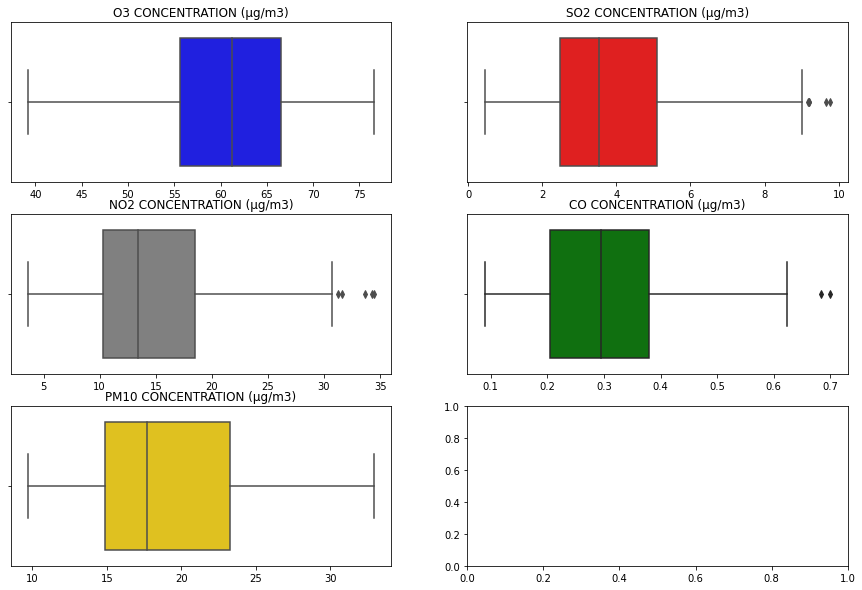

In [45]:
vis.outliers_total(air, "O3", "SO2", "NO2", "CO", "PM10")

The upper left plot represents ozone (O3) concentration, this graph confirms that there aren't any outliers, as no values are above or below the maximum and minimum value. 

The maximum ozone value is 76.55 µg/m3, its minimum 39.20 µg/m3 and its mean 60.52 µg/m3 for the 6 studied years (2014-2019). These values shown in the table are confirmed when *describing* the dataframe. These values are below the maximum allowable threshold stipulated by the capital's country (The below image showing their limit requirements has been taken from their official webpage). 

In [46]:
# stats for all years combined
air.loc[air["POLLUTANT"]=="O3"].describe() 

YEAR       VALUE
count   300.000000  300.000000
mean   2016.500000   60.520570
std       1.710679    7.266122
min    2014.000000   39.207032
25%    2015.000000   55.570881
50%    2016.500000   61.227735
75%    2018.000000   66.493071
max    2019.000000   76.551196

<table align="left"> 
<tr><td width="800"><img src="../resources/ozone_limits.PNG" style="width:500;height:500"></td> 
<td style="image-align:left"> 
</td></tr> 
</table>

The upper right plot shows Sulphur Dioxide (SO2) concentrations, where there are few outliers above the maximum value.

The maximum sulphur dioxide value is 9.77 µg/m3, its minimum 0.44 µg/m3 and its mean 3.97 µg/m3 for the 6 studied years (2014-2019). As before the limits stipulated by the governemnt has also been included for reference. 

This graph shows outliers so a deeper investigation is conducted to conclude how many they are and if they are relevant.

In [47]:
# stats for all years combined
air.loc[air["POLLUTANT"]=="SO2"].describe() 

YEAR       VALUE
count   299.000000  299.000000
mean   2016.505017    3.966500
std       1.711335    2.011419
min    2014.000000    0.445048
25%    2015.000000    2.489298
50%    2017.000000    3.530479
75%    2018.000000    5.094906
max    2019.000000    9.775640

<table align="left"> 
<tr><td width="800"><img src="../resources/so2_limits.PNG" style="width:500;height:500"></td> 
<td style="image-align:left"> 
</td></tr> 
</table>

so2 outliers are calculated

In [48]:
def outliers(dataframe):
    """
    """
    # Percentiles
    Q1 = air_so2.quantile(0.25)
    Q3 = air_so2.quantile(0.75)
    #Interquartile range
    IQR_RIC = Q3 - Q1
    lower_limit = (Q1 - 1.5 * IQR_RIC)
    upper_limit = (Q3 + 1.5 * IQR_RIC)

    # Values outside the interquartile range:
    df = dataframe[((dataframe < lower_limit) | (dataframe > upper_limit)).any(axis=1)]

    print("Max value:", df["VALUE"].quantile(1))         # que significa este uno?
    sns.boxplot(x=df["VALUE"])

    return plt.show()    


In [49]:
#def no_outliers():-------------pasar a visualization file
# Percentiles
Q1 = air_so2.quantile(0.25)
Q3 = air_so2.quantile(0.75)
#Interquartile range
IQR_RIC = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR_RIC)
upper_limit = (Q3 + 1.5 * IQR_RIC)

# Values outside the interquartile range:
df = air_so2[((air_so2 < lower_limit) | (air_so2 > upper_limit)).any(axis=1)]

print("Max value for SO2 values:", df["VALUE"].quantile(1))         # que significa este uno?
sns.boxplot(x=df["VALUE"])

plt.show()                                    #pero 9.77 es el max

NameError: name 'air_so2' is not defined

The number of outliers are also calculated to ensure not a lot of values are lost when removing them. In this case, there are 10 outliers over a 598 number of values, so it can be assumed to be reasonable to ignore them.

In [208]:
df2 = air_so2[~((air_so2 < (Q1 - 1.5 * IQR)) |(air_so2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(air_so2.shape)
df2.shape   #selecciono los datos y con mascara los quito

(598, 4)


(588, 4)

The middle left plot shows Nitrogen Dioxide (NO2) concentrations, which also has few outliers above the maximum value. Similarly to the above outliers are calculated to have a better understanding on the obtained data.

The maximum sulphur dioxide value is 34.44 µg/m3, where the allowable value is stipulated as 40 µg/m3. Its minimum 3.61 µg/m3 and its mean 14.73 µg/m3 for the 6 studied years (2014-2019). 

In [88]:
# stats for all years combined
air.loc[air["POLLUTANT"]=="NO2"].describe() 

YEAR       VALUE
count   300.000000  300.000000
mean   2016.500000   14.736531
std       1.710679    6.041571
min    2014.000000    3.609716
25%    2015.000000   10.262409
50%    2016.500000   13.444916
75%    2018.000000   18.467335
max    2019.000000   34.444253

<table align="left"> 
<tr><td width="800"><img src="../resources/no2_limits.PNG" style="width:500;height:500"></td> 
<td style="image-align:left"> 
</td></tr> 
</table>

Max value for NO2 values: 5.614588213099456


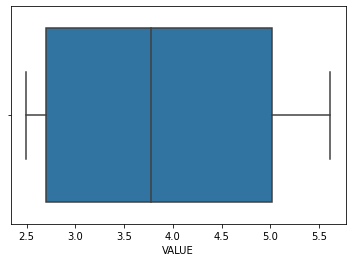

In [210]:
# Percentiles
Q1 = air_no2.quantile(0.25)
Q3 = air_no2.quantile(0.75)
#Interquartile range
IQR_RIC = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR_RIC)
upper_limit = (Q3 + 1.5 * IQR_RIC)

# Values outside the interquartile range:
df = air_so2[((air_no2 < lower_limit) | (air_no2 > upper_limit)).any(axis=1)]

print("Max value for NO2 values:", df["VALUE"].quantile(1))         # que significa este uno?
sns.boxplot(x=df["VALUE"])

plt.show()  

The outliners above the maximum value are 48, the difference between the original boxplot and the one without outliers. These are a number of values acceptable to not consider, so the study can process without considering them.

In [38]:
df2 = air_no2[~((air_no2 < (Q1 - 1.5 * IQR)) |(air_no2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(air_no2.shape)
df2.shape

NameError: name 'air_no2' is not defined

The middle right shows Carbon Dioxide (CO) concentrations, with few outliers above the maximum value. 

The maximum sulphur dioxide value is 0.7 µg/m3, its minimum 0.09 µg/m3 and its mean 0.3 µg/m3 for the 6 studied years (2014-2019). 

In [89]:
# stats for all years combined
air.loc[air["POLLUTANT"]=="CO"].describe() 

YEAR       VALUE
count   251.000000  251.000000
mean   2016.494024    0.302442
std       1.712006    0.124647
min    2014.000000    0.089043
25%    2015.000000    0.204874
50%    2016.000000    0.294972
75%    2018.000000    0.378912
max    2019.000000    0.700000

<table align="left"> 
<tr><td width="800"><img src="../resources/co_limits.PNG" style="width:500;height:500"></td> 
<td style="image-align:left"> 
</td></tr> 
</table>

The lower right represents particles matters, with a diameter of 10 microns or less (PM10). This graph confirms that there aren't any outliers, as no values are above or below the maximum and minimum value.

The maximum ozone value is 32.94 µg/m3, its minimum 9.70 µg/m3 and its mean 18.87 µg/m3 for the 6 studied years (2014-2019).

In [128]:
# stats for all years combined
air.loc[air["POLLUTANT"]=="PM10"].describe() 

YEAR       VALUE
count   239.000000  239.000000
mean   2016.615063   18.868515
std       1.686060    5.304116
min    2014.000000    9.703704
25%    2015.000000   14.885639
50%    2017.000000   17.706091
75%    2018.000000   23.294444
max    2019.000000   32.943751

<table align="left"> 
<tr><td width="800"><img src="../resources/pm10_limits.PNG" style="width:500;height:500"></td> 
<td style="image-align:left"> 
</td></tr> 
</table>

From the above graphs it can be seen that gas concentration in Spain does not exceed the maximum acceptable values.

Now that it has been confirmed that all these values are within an acceptable range they can be plot to observe their evolution along the time. For this analysis all regions will be combined.

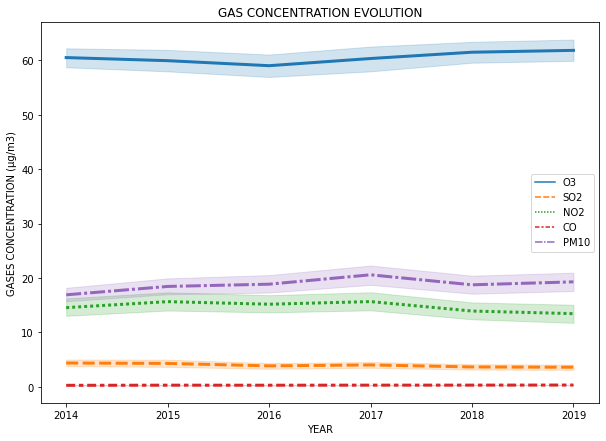

In [42]:
vis.pollutant_evolution_all(air, "YEAR", "VALUE", "POLLUTANT", "POLLUTANT", "GASES")


From this combined table the evolution seems quite flat, so it is recommendable to study each pollutant one by one to understand better their changes, if any.

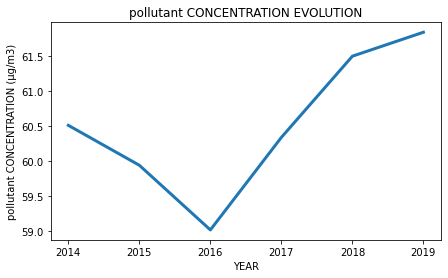

In [29]:
# una a una para streamlit

# O3 concentration evolution
vis.pollutant_evolution_one(o3_mean, "O3")

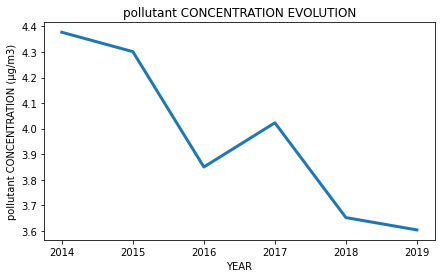

In [30]:
# SO2 concentration evolution
vis.pollutant_evolution_one(so2_mean, "SO2")


 #explicar porque el descenso

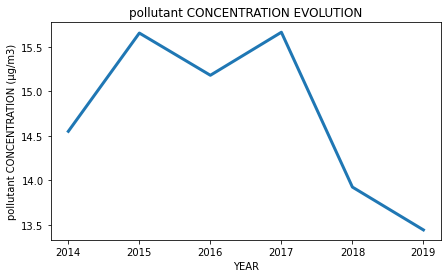

In [31]:
# NO2 concentration evolution
vis.pollutant_evolution_one(no2_mean, "NO2")


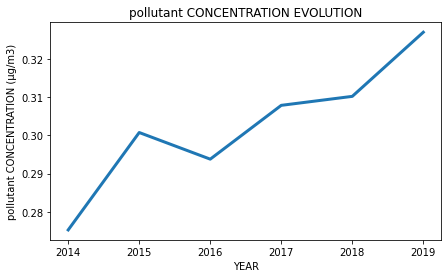

In [32]:
# CO concentration evolution
vis.pollutant_evolution_one(co_mean, "CO")


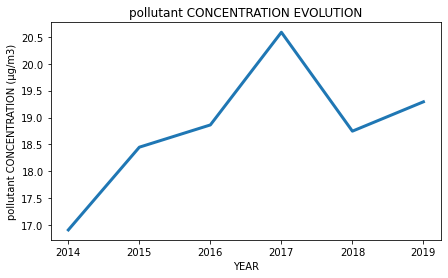

In [33]:
# PM10 concentration evolution
vis.pollutant_evolution_one(pm10_mean, "PM10")


In [ ]:
# estudia los datos para entender que representan

The above graphs shows how the gases concentration has changed along the years, but they dont know the regions in the country with the highest values. The below tree map plots are intended for this purpose.

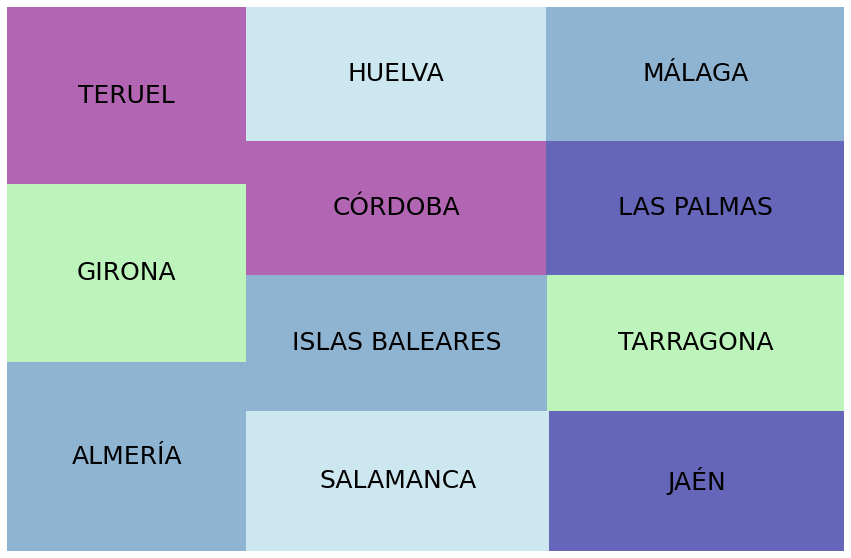

In [42]:
# Tree map for O3
vis.tree_map(o3_mean, "O3")


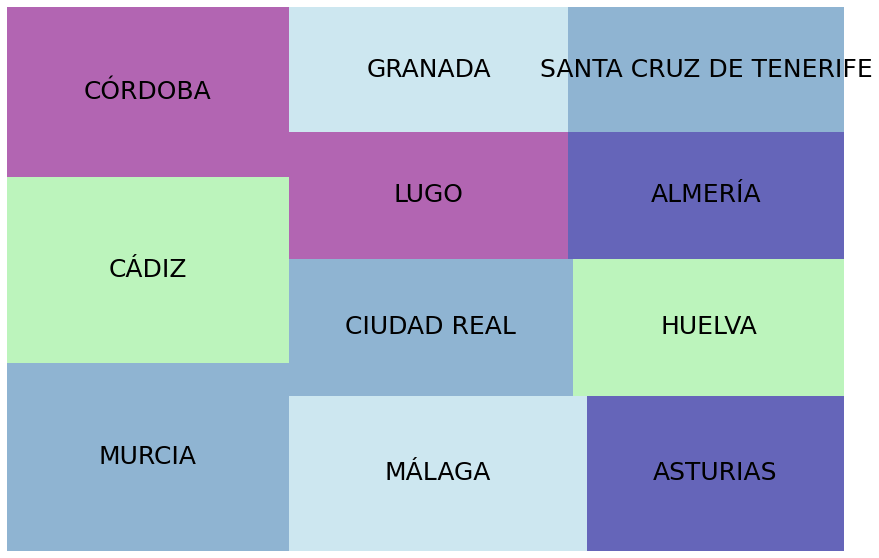

In [43]:
# Tree map for SO2
vis.tree_map(so2_mean, "SO2")


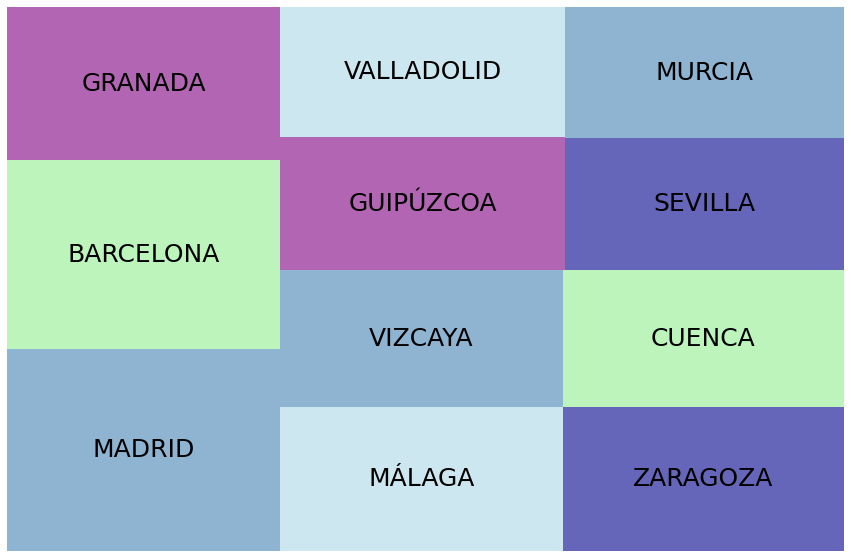

In [47]:
# Tree map for NO2
vis.tree_map(no2_mean, "NO2")


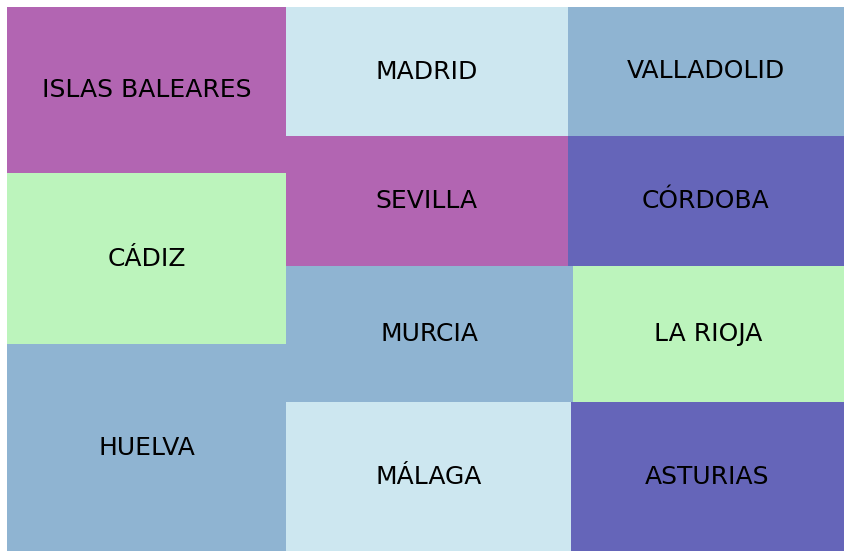

In [45]:
# Tree map for CO
vis.tree_map(co_mean, "CO")


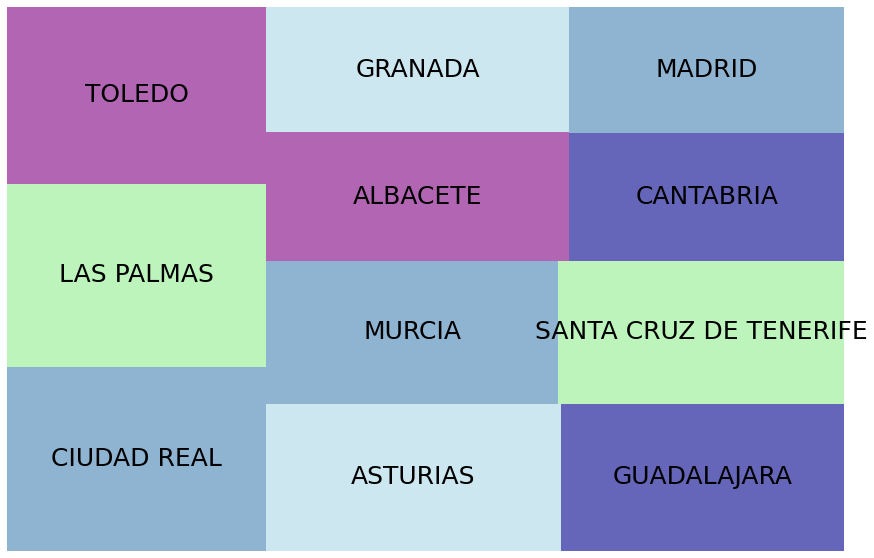

In [46]:
# Tree map for PM10
vis.tree_map(pm10_mean, "PM10")


In [ ]:
# calcular cual es la peor de todas?

While it was expected to large cities to have a higher pollutant concentration these graphs shows that concentration values are pretty equal nation-wide.

In [310]:
# folium aqui

44.7

Now some initial graphs for the temperature value are drawn to obtain a better understanding of it.

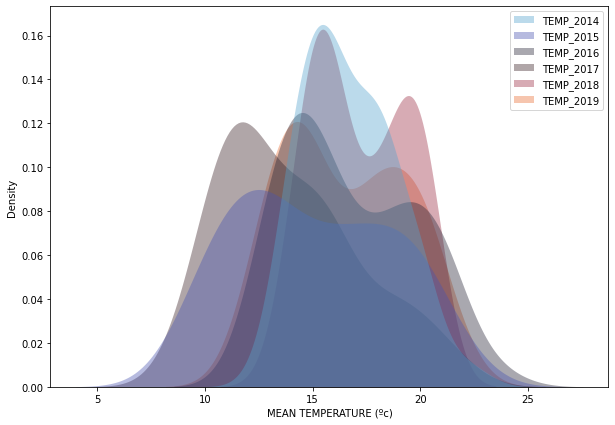

In [54]:
vis.temp_plot(temp)

In [ ]:
# temperature each year independently

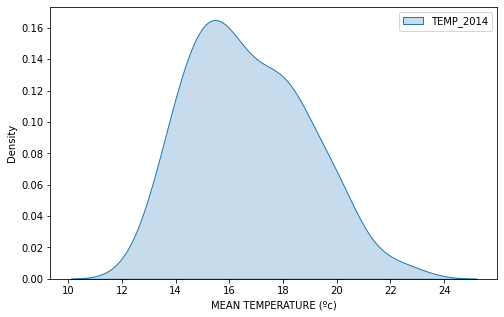

In [68]:
temp_single(temp.T.iloc[:,0:1])

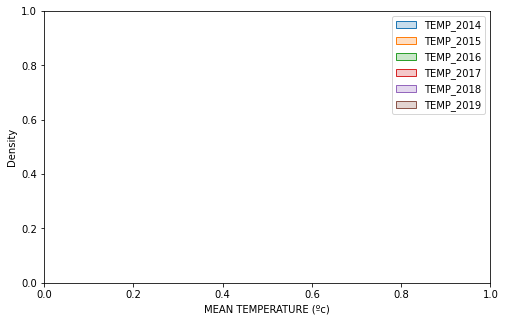

In [59]:
# 2014
vis.temp_single(temp.iloc[:,1:2])   #revisar

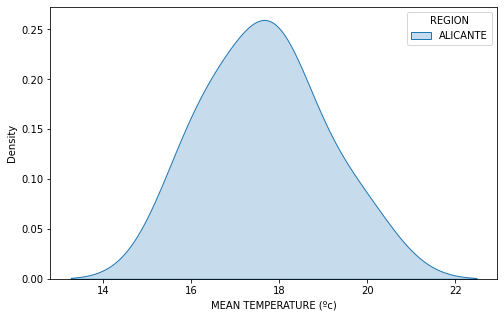

In [93]:
# 2015
vis.temp_single(temp.iloc[:,2:3])

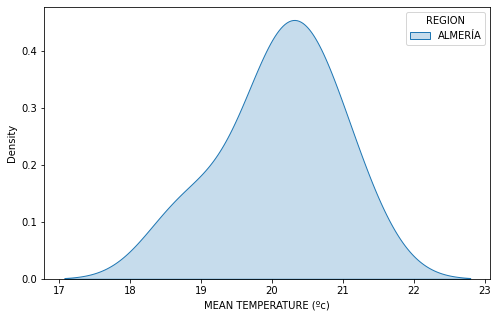

In [94]:
# 2016
vis.temp_single(temp.iloc[:,3:4])

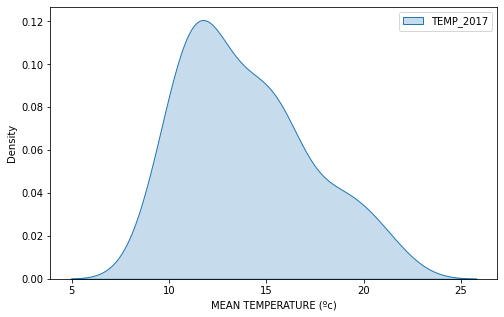

In [703]:
# 2017
vis.temp_single(temp.iloc[:,4:5])

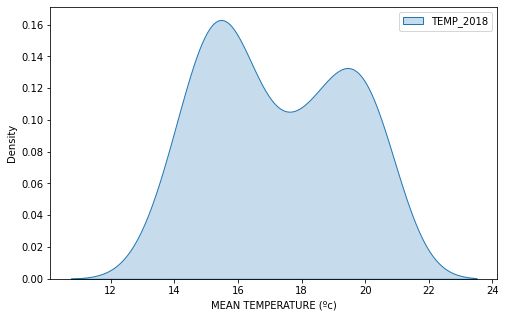

In [704]:
# 2018
vis.temp_single(temp.iloc[:,5:6])

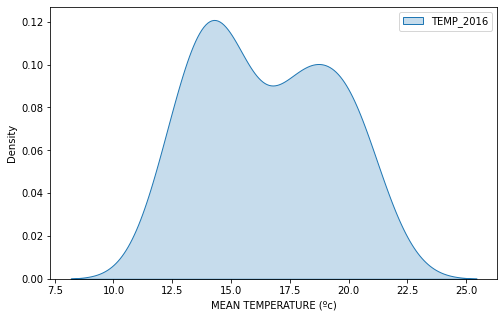

In [705]:
# 2019
vis.temp_single(temp.iloc[:,6:7])

Compare how temperature changes along the years in the country as a whole.

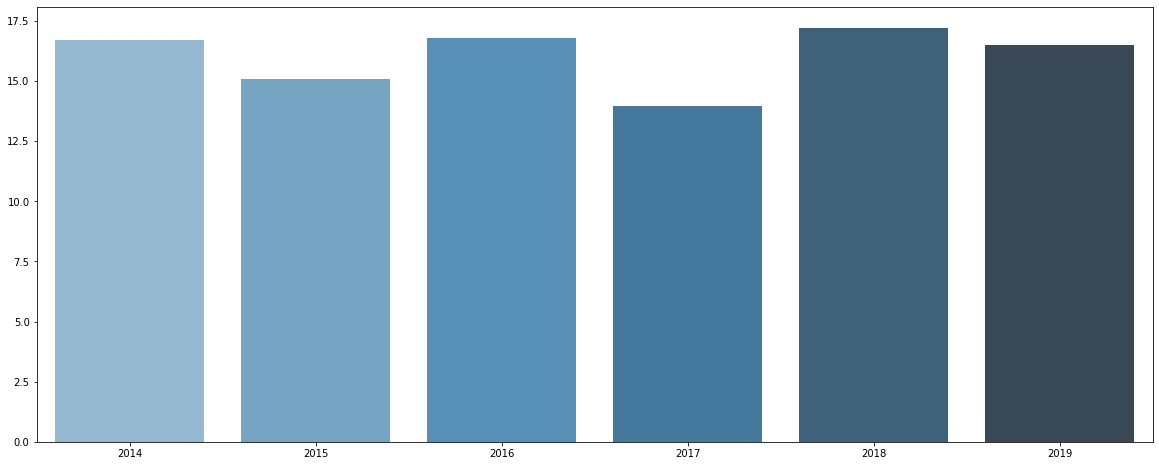

In [69]:
temp = temp.T
temp_year = pd.DataFrame({"2014": temp["TEMP_2014"].mean(), "2015": temp["TEMP_2015"].mean(),   
                            "2016": temp["TEMP_2016"].mean(), "2017": temp["TEMP_2017"].mean(), 
                            "2018": temp["TEMP_2018"].mean(), "2019": temp["TEMP_2019"].mean()}, index=[0])
                      
vis.temp_country(temp_year)


Now that we have an idea of each class of values, pollutants and temperature, let's compare them to see if there is any correlation between them.

In [70]:
vis.corr_dataframe(temp.T, air, "O3", "SO2", "NO2", "CO", "PM10")


KeyError: 'REGION'

In [83]:
temp.head()

TEMP_2014  TEMP_2015  TEMP_2016  TEMP_2017  TEMP_2018  TEMP_2019
REGION                                                                    
A CORUÑA     15.520     14.940     16.195     12.975     16.240     15.225
ALBACETE     18.795     16.850     17.715     14.340     17.165     17.580
ALICANTE     19.725     16.460     17.780     16.015     18.070     17.840
ALMERÍA      20.410     20.105     21.115     18.760     20.520     19.750
ASTURIAS     14.015     12.020     14.105     10.820     14.860     13.085

In [76]:
o3_mean.groupby

REGION  YEAR         O3
0    A CORUÑA  2014  58.130971
1    A CORUÑA  2015  53.012985
2    A CORUÑA  2016  54.594886
3    A CORUÑA  2017  52.980306
4    A CORUÑA  2018  59.358559
..        ...   ...        ...
295     ÁVILA  2015  54.647340
296     ÁVILA  2016  61.628947
297     ÁVILA  2017  63.192052
298     ÁVILA  2018  70.026318
299     ÁVILA  2019  68.426164

[300 rows x 3 columns]

In [48]:
final_df.corr()  # sin incluir las columnas no numéricas

YEAR     VALUE  TEMP_2014  TEMP_2015  TEMP_2016  TEMP_2017  \
YEAR       1.000000  0.004918   0.011132   0.014424   0.014216   0.009624   
VALUE      0.004918  1.000000   0.046141   0.056601   0.052184   0.042654   
TEMP_2014  0.011132  0.046141   1.000000   0.827909   0.792395   0.909872   
TEMP_2015  0.014424  0.056601   0.827909   1.000000   0.954573   0.904924   
TEMP_2016  0.014216  0.052184   0.792395   0.954573   1.000000   0.863556   
TEMP_2017  0.009624  0.042654   0.909872   0.904924   0.863556   1.000000   
TEMP_2018  0.012078  0.047043   0.863718   0.936092   0.942716   0.919484   
TEMP_2019  0.013215  0.053485   0.906668   0.932147   0.916420   0.937850   

           TEMP_2018  TEMP_2019  
YEAR        0.012078   0.013215  
VALUE       0.047043   0.053485  
TEMP_2014   0.863718   0.906668  
TEMP_2015   0.936092   0.932147  
TEMP_2016   0.942716   0.916420  
TEMP_2017   0.919484   0.937850  
TEMP_2018   1.000000   0.962815  
TEMP_2019   0.962815   1.000000

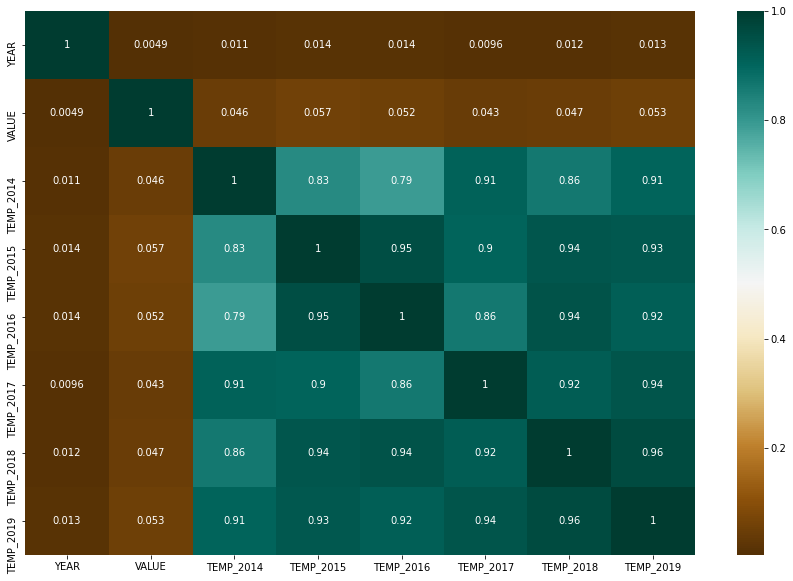

In [110]:
#f, ax = plt.subplots(figsize=(13, 10))
#sns.heatmap(air.corr(), vmin = -1, vmax = 1, annot = True, linewidths = .5)

#plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr(), cmap="BrBG",annot=True)  #estamos haciendo la distribución de valores que tiene el heatmap, triangulo

plt.show()

In [ ]:
# y hablar sobre la correlación

In [ ]:
# que mas puedo comparar? enseñar 5 graficas en donde muestre mi hipotesis

As requested as part of the project, all tendencies for each column of the dataframe have been plot.

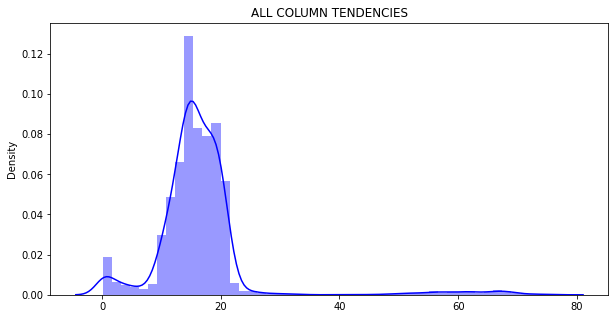

In [66]:
# HACE FALTA TODAS LAS COLUMNAS JUNTAS?

plt.figure(figsize=(10,5))
sns.distplot(final_df.iloc[:,3:], color="blue")

plt.title("ALL COLUMN TENDENCIES")

plt.show()

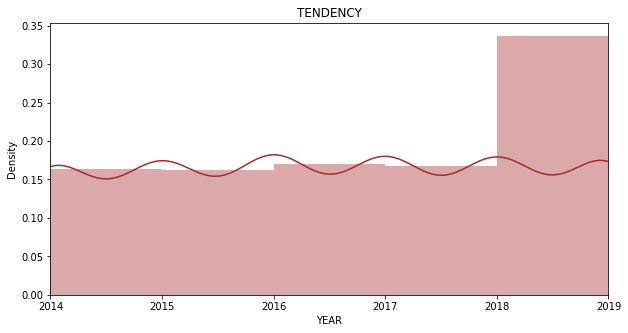

In [84]:
# Column 1 tendency - years (column 0 is non numeric so it is not possible to plot it like this)
vis.column_tendency(final_df.iloc[:,1], (2014,2019))

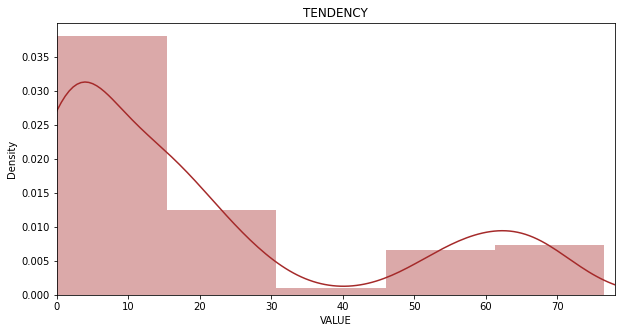

In [85]:
# Column 3 tendency - value of pollutants (column 2 is non numeric so it is not possible to plot it like this)
vis.column_tendency(final_df.iloc[:,3], (0,78))    # (value of pollutants) no tiene sentido poruqe todos estan mezclados

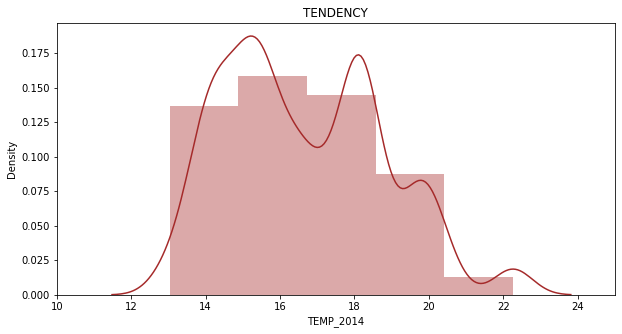

In [86]:
# Column 4 tendency - temp2014
vis.column_tendency(final_df.iloc[:,4], (10,25))

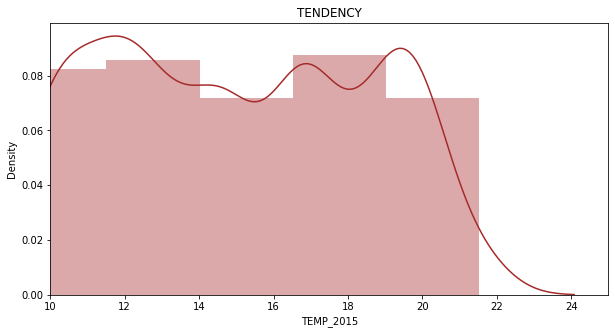

In [88]:
# Column 5 tendency - temp2015
vis.column_tendency(final_df.iloc[:,5], (10,25))

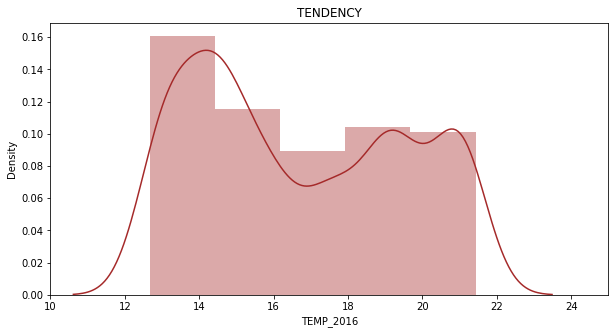

In [87]:
# Column 6 tendency - temp2016
vis.column_tendency(final_df.iloc[:,6], (10,25))

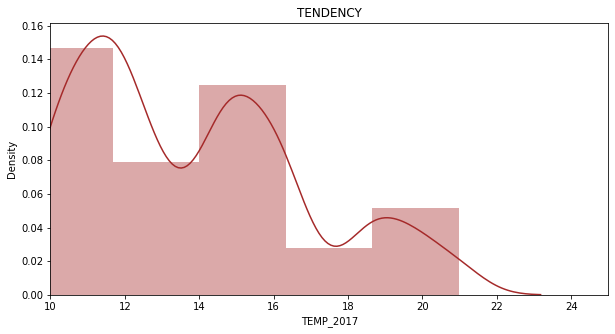

In [90]:
# Column 7 tendency - temp2017
vis.column_tendency(final_df.iloc[:,7], (10,25))

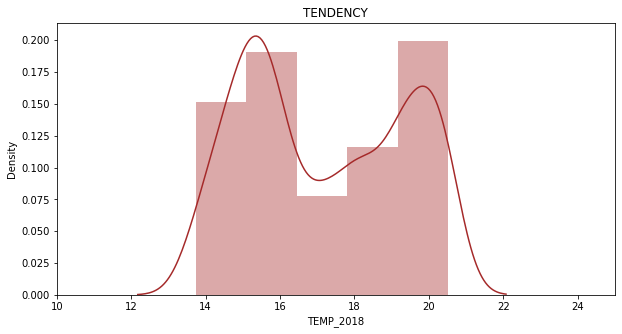

In [91]:
# Column 8 tendency - temp2018
vis.column_tendency(final_df.iloc[:,8], (10,25))

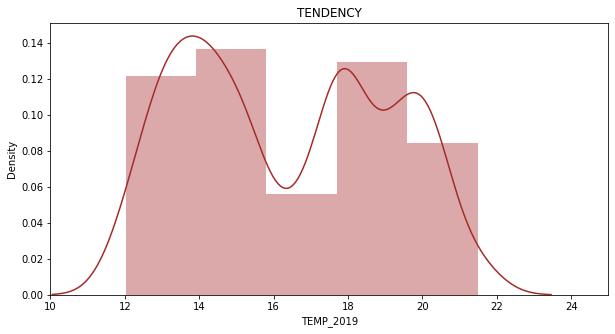

In [92]:
# Column 9 tendency - temp2019
vis.column_tendency(final_df.iloc[:,9], (10,25))

Below it is also shown the histogram of each column of the dataset (withbins=5. How are the ranges painted)

In [ ]:
# yo enseñé las tendencias con histogramas......

In [ ]:
# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000] #hay que dividir entre 1000 para ver todos los colores variando y no solo el rojo en una zona por ejemplo
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

Pie chart showing the time to finish the project

In [45]:
data = pd.DataFrame([4, 1, 1, 1, 1, 1, 1, 1, 1], index = ["1.Find the subject", "2.Find the data related to the project", "3.Define a hypothesis", "4.Define steps", "5.a.Get the data", "5.b.Clean the data", "5.c.Draw all graphs", "5.e.Explain results", "6.Document all steps"])

plt.figure(figsize = (8,8))
plt.pie(data, labels = data.index, autopct='%1.2f%%')

plt.show()

ValueError: x must be 1D

In [ ]:
"""import matplotlib.pyplot as plt

labels = "Ordenar", "Gráficas","Presentación", "Data"
sizes=[10,15,15,60]
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis("equal")

plt.show()"""

In [90]:
# pie chart
labels = "1.Find the subject", "2.Find the data related to the project", "3.Define a hypothesis", "4.Define steps": 1, "5.a.Get the data": 1, "5.b.Clean the data": 1, "5.c.Draw all graphs": 1, "5.e.Explain results": 1, "6.Document all steps":1}

plt.figure(figsize = (8,8))
plt.pie(data.values, labels = data.keys(), autopct='%1.2f%%')

plt.show()

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'